In [ ]:
# Summary list:
# Grid world :  10000
# Exit      :   10000
# Space shooter : 40000
# Crawler     : 30000

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
from tensorflow.python.summary.summary_iterator import summary_iterator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/TensorResults"
%cd '/content/drive/My Drive/TensorResults'

Crawler  Exit  Grid  Space
/content/drive/My Drive/TensorResults


In [ ]:
def moving_avg(x, N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

In [ ]:
def getValuesFor(file, label):
  arr = []
  for event in summary_iterator(file+'.0'):
    for value in event.summary.value:
        #print(value.tag)
        if value.HasField('simple_value'):
            #print(value.simple_value)
            if(value.tag == label):
              arr.append(value.simple_value)
  return arr

def getValuesForMultiple(file,label,count):
  arr = []
  counter = 1
  while counter <= count:
    for event in summary_iterator(file+str(counter)+'.0'):
      for value in event.summary.value:
          #print(value.tag)
          if value.HasField('simple_value'):
              #print(value.simple_value)
              if(value.tag == label):
                arr.append(value.simple_value)
    counter = counter + 1
  return arr

In [ ]:
tagList = []

for event in summary_iterator('Crawler/Gail.0'):
    for value in event.summary.value:
      if value.tag not in tagList:
        tagList.append(value.tag)

print(tagList)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


['Hyperparameters/text_summary', 'Policy/Entropy', 'Time/Step : Millis', 'Environment/Episode Length', 'Policy/Gail Value Estimate', 'Environment/Cumulative Reward', 'Environment/Cumulative Reward_hist', 'Policy/Gail Reward', 'Losses/Policy Loss', 'Losses/Value Loss', 'Policy/Learning Rate', 'Policy/Epsilon', 'Policy/Beta', 'Policy/GAIL Policy Estimate', 'Policy/GAIL Expert Estimate', 'Losses/GAIL Loss', 'Policy/GAIL Grad Mag Loss']


# Grid World

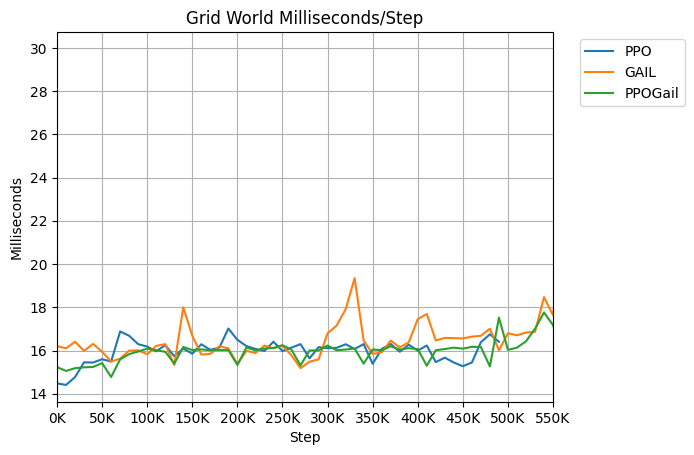

In [ ]:
# Milliseconds
plt.xlabel("Step")
plt.ylabel("Milliseconds")
plt.title("Grid World Milliseconds/Step")


TimeArr = getValuesFor('Grid/PPO',"Time/Step : Millis")
TimeArr.pop(0)
plt.plot(TimeArr)

TimeArr = getValuesFor('Grid/Gail',"Time/Step : Millis")
TimeArr.pop(0)
plt.plot(TimeArr)


TimeArr = getValuesFor('Grid/PPOGail',"Time/Step : Millis")
TimeArr.pop(0)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x)+"K")

plt.xticks(total[::5] ,tickList[::5])


#plt.ylim(0)
plt.xlim(0,55)

plt.grid()
plt.legend(["PPO","GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

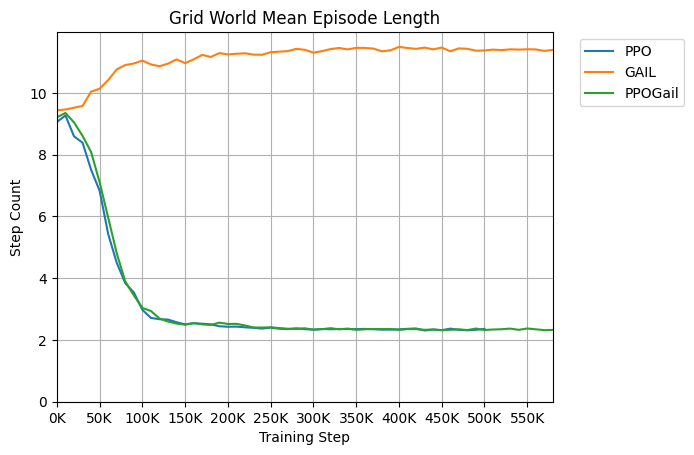

In [ ]:
# Episode Length
plt.xlabel("Training Step")
plt.ylabel("Step Count")
plt.title("Grid World Mean Episode Length")

label = "Environment/Episode Length"

TimeArr = getValuesFor('Grid/PPO',label)
plt.plot(TimeArr)

TimeArr = getValuesFor('Grid/Gail',label)
plt.plot(TimeArr)


TimeArr = getValuesFor('Grid/PPOGail',label)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x)+"K")

plt.xticks(total[::5] ,tickList[::5])


plt.ylim(0)
plt.xlim(0,58)

plt.grid()

plt.legend(["PPO","GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

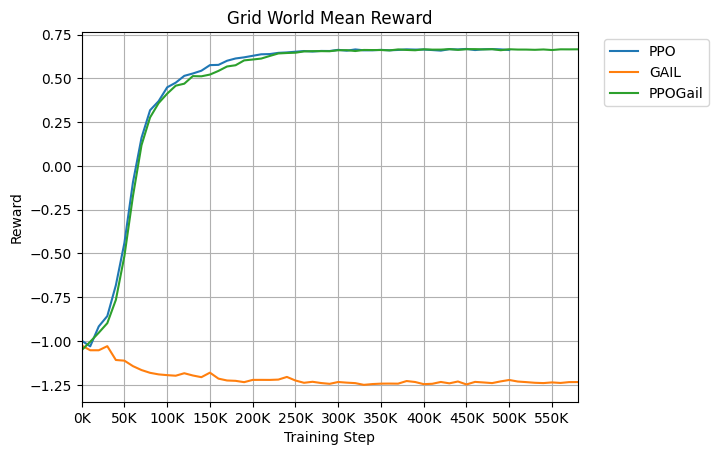

In [ ]:
# Mean Reward

plt.xlabel("Training Step")
plt.ylabel("Reward")
plt.title("Grid World Mean Reward")

label = "Environment/Cumulative Reward"

TimeArr = getValuesFor('Grid/PPO',label)
plt.plot(TimeArr)

TimeArr = getValuesFor('Grid/Gail',label)
plt.plot(TimeArr)


TimeArr = getValuesFor('Grid/PPOGail',label)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x)+"K")

plt.xticks(total[::5] ,tickList[::5])

#plt.ylim(0)
plt.xlim(0,58)

plt.grid()

plt.legend(["PPO","GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

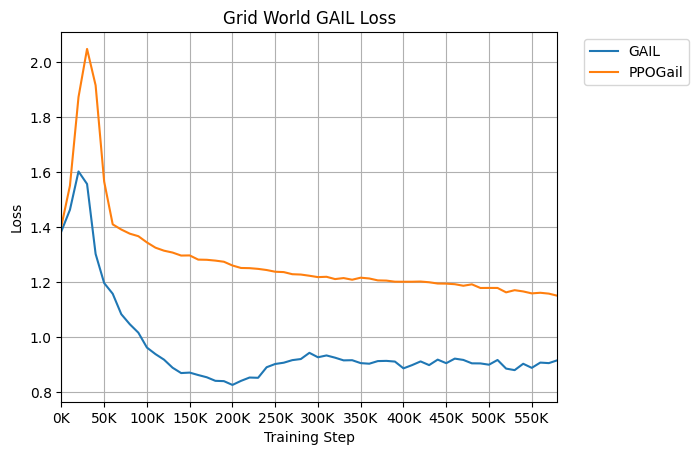

In [ ]:
# Losses/GAIL Loss
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Grid World GAIL Loss")



label = "Losses/GAIL Loss"

TimeArr = getValuesFor('Grid/Gail',label)
plt.plot(TimeArr)


TimeArr = getValuesFor('Grid/PPOGail',label)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x)+"K")

plt.xticks(total[::5] ,tickList[::5])

#plt.ylim(0)
plt.xlim(0,58)

plt.grid()

plt.legend(["GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

In [ ]:
# Get max reward for each method
label = 'Environment/Cumulative Reward'

PPOArr = getValuesFor('Grid/PPO',label)

GAILArr = getValuesFor('Grid/Gail',label)

PPOGAILArr = getValuesFor('Grid/PPOGail',label)

print(np.argmax(PPOArr))

print("Max Reward")
print(f"PPO: {max(PPOArr)} , index: {np.argmax(PPOArr)}")
print(f"GAIL: {max(GAILArr)}, index: {np.argmax(GAILArr)} ")
print(f"GAILPPO: {max(PPOGAILArr)}, index: {np.argmax(PPOGAILArr)}")

45
Max Reward
PPO: 0.6677943468093872 , index: 45
GAIL: -1.0253403186798096, index: 0 
GAILPPO: 0.6666666269302368, index: 46


# Find Exit Agent

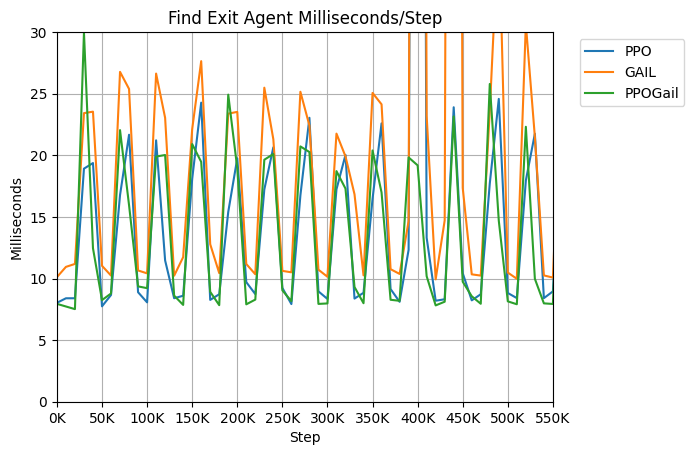

In [ ]:
# Milliseconds
plt.xlabel("Step")
plt.ylabel("Milliseconds")
plt.title("Find Exit Agent Milliseconds/Step")


TimeArr = getValuesFor('Exit/PPO',"Time/Step : Millis")
TimeArr.pop(0)
plt.plot(TimeArr)

TimeArr = getValuesFor('Exit/Gail',"Time/Step : Millis")
TimeArr.pop(0)
plt.plot(TimeArr)


TimeArr = getValuesFor('Exit/PPOGail',"Time/Step : Millis")
TimeArr.pop(0)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x)+"K")

plt.xticks(total[::5] ,tickList[::5])


plt.ylim(0,30)
plt.xlim(0,55)

plt.grid()
plt.legend(["PPO","GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

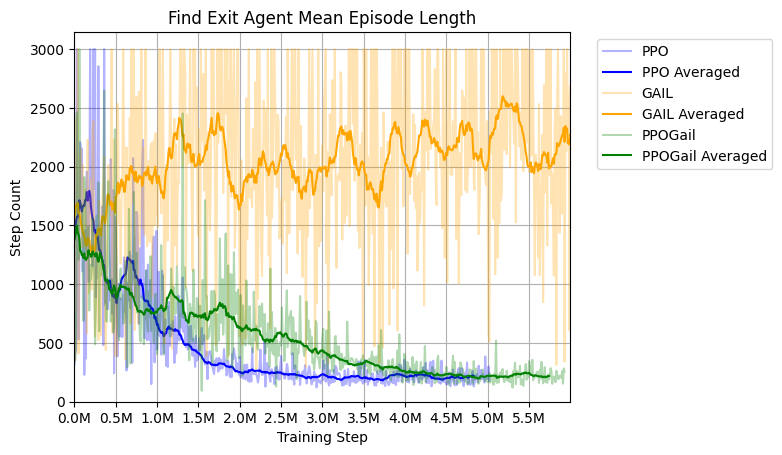

In [ ]:
# Episode Length
plt.xlabel("Training Step")
plt.ylabel("Step Count")
plt.title("Find Exit Agent Mean Episode Length")

label = "Environment/Episode Length"

TimeArr = getValuesFor('Exit/PPO',label)
plt.plot(TimeArr , alpha = 0.3,  color='blue')
plt.plot(moving_avg(TimeArr, 20), color='blue' )

TimeArr = getValuesFor('Exit/Gail',label)
plt.plot(TimeArr , alpha = 0.3, color='orange')
plt.plot(moving_avg(TimeArr, 20), color='orange' )

TimeArr = getValuesFor('Exit/PPOGail',label)
plt.plot(TimeArr, alpha = 0.3, color='green')
plt.plot(moving_avg(TimeArr, 20), color='green' )


total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::50] ,tickList[::50])


plt.ylim(0)
plt.xlim(0,600)

plt.grid()

plt.legend(["PPO", "PPO Averaged","GAIL", "GAIL Averaged","PPOGail", "PPOGail Averaged"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

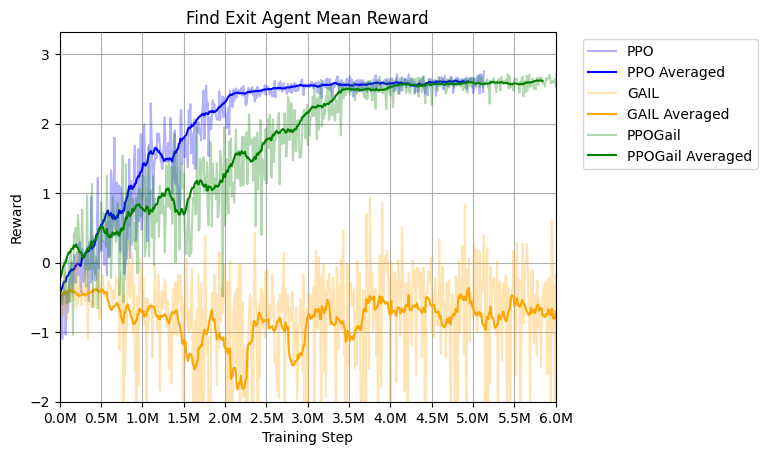

In [ ]:
# Mean Reward

plt.xlabel("Training Step")
plt.ylabel("Reward")
plt.title("Find Exit Agent Mean Reward")

label = "Environment/Cumulative Reward"


TimeArr = getValuesFor('Exit/PPO',label)
plt.plot(TimeArr , alpha = 0.3,  color='blue')
plt.plot(moving_avg(TimeArr, 20), color='blue' )

TimeArr = getValuesFor('Exit/Gail',label)
plt.plot(TimeArr , alpha = 0.3, color='orange')
plt.plot(moving_avg(TimeArr, 20), color='orange' )

TimeArr = getValuesFor('Exit/PPOGail',label)
plt.plot(TimeArr, alpha = 0.3, color='green')
plt.plot(moving_avg(TimeArr, 20), color='green' )


total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::50] ,tickList[::50])


plt.ylim(-2)
plt.xlim(0,600)

plt.grid()

plt.legend(["PPO", "PPO Averaged","GAIL", "GAIL Averaged","PPOGail", "PPOGail Averaged"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

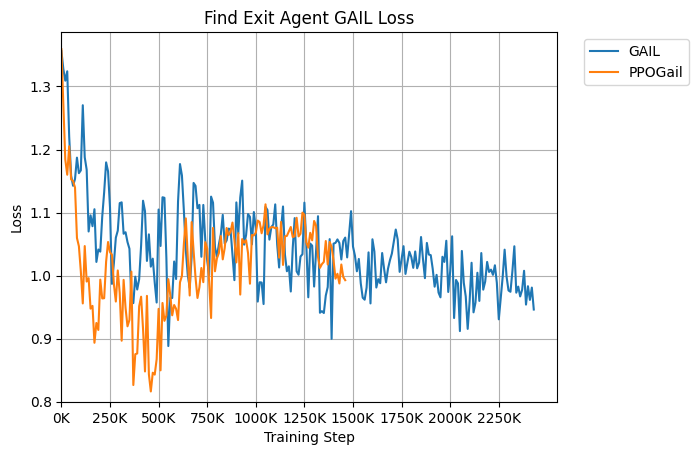

In [ ]:
# Losses/GAIL Loss
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Find Exit Agent GAIL Loss")



label = "Losses/GAIL Loss"

TimeArr = getValuesFor('Exit/Gail',label)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

TimeArr = getValuesFor('Exit/PPOGail',label)
plt.plot(TimeArr)



plt.xticks(total[::25] ,tickList[::25])

plt.ylim(0.8)
plt.xlim(0)

plt.grid()

plt.legend(["GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

In [ ]:
# Get max reward for each method
label = 'Environment/Cumulative Reward'

PPOArr = getValuesFor('Exit/PPO',label)

GAILArr = getValuesFor('Exit/Gail',label)

PPOGAILArr = getValuesFor('Exit/PPOGail',label)

print(np.argmax(PPOArr))

print("Max Reward")
print(f"PPO: {max(PPOArr)} , index: {np.argmax(PPOArr)}")
print(f"GAIL: {max(GAILArr)}, index: {np.argmax(GAILArr)} ")
print(f"GAILPPO: {max(PPOGAILArr)}, index: {np.argmax(PPOGAILArr)}")

513
Max Reward
PPO: 2.746217727661133 , index: 513
GAIL: 2.144455909729004, index: 806 
GAILPPO: 2.719273090362549, index: 601


# 3D Shooter

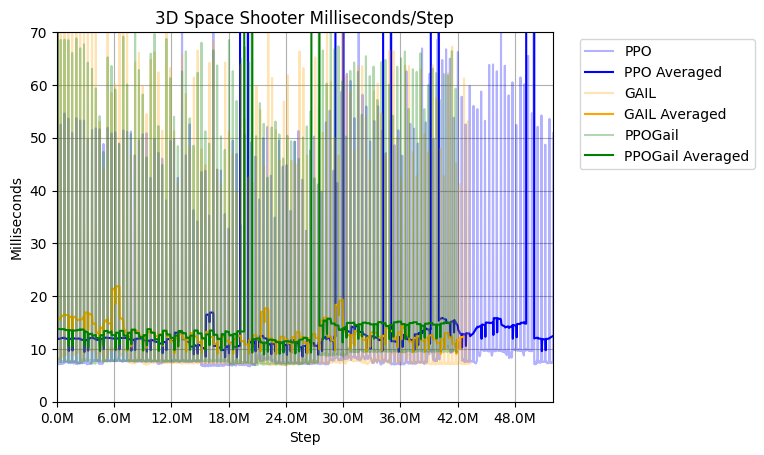

In [ ]:
# Milliseconds
plt.xlabel("Step")
plt.ylabel("Milliseconds")
plt.title("3D Space Shooter Milliseconds/Step")

label = "Time/Step : Millis"

TimeArr = getValuesForMultiple('Space/PPO',label,6)
plt.plot(TimeArr , alpha = 0.3,  color='blue')
plt.plot(moving_avg(TimeArr, 20), color='blue' )

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*40, 40)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::150] ,tickList[::150])



TimeArr = getValuesFor('Space/Gail',label)
plt.plot(TimeArr , alpha = 0.3, color='orange')
plt.plot(moving_avg(TimeArr, 20), color='orange' )

TimeArr = getValuesForMultiple('Space/PPOGail',label,3)
plt.plot(TimeArr, alpha = 0.3, color='green')
plt.plot(moving_avg(TimeArr, 20), color='green' )



plt.ylim(0,70)
plt.xlim(0,1300)

plt.grid()

plt.legend(["PPO", "PPO Averaged","GAIL", "GAIL Averaged","PPOGail", "PPOGail Averaged"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

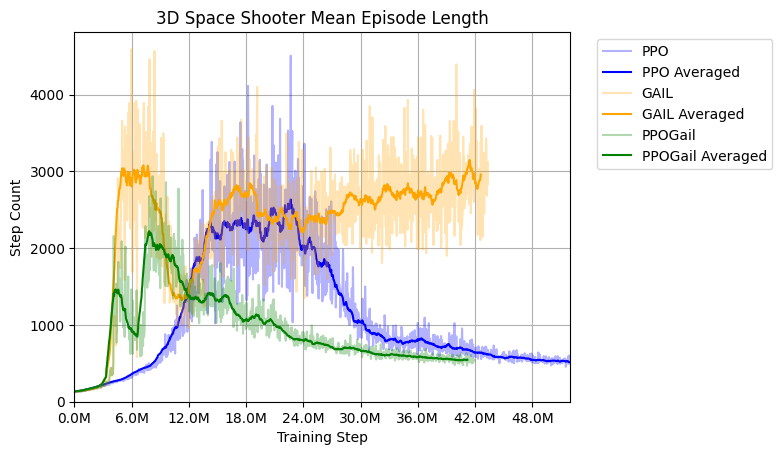

In [ ]:
# Episode Length
plt.xlabel("Training Step")
plt.ylabel("Step Count")
plt.title("3D Space Shooter Mean Episode Length")

label = "Environment/Episode Length"

TimeArr = getValuesForMultiple('Space/PPO',label,6)
plt.plot(TimeArr , alpha = 0.3,  color='blue')
plt.plot(moving_avg(TimeArr, 20), color='blue' )

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*40, 40)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::150] ,tickList[::150])



TimeArr = getValuesFor('Space/Gail',label)
plt.plot(TimeArr , alpha = 0.3, color='orange')
plt.plot(moving_avg(TimeArr, 20), color='orange' )

TimeArr = getValuesForMultiple('Space/PPOGail',label,3)
plt.plot(TimeArr, alpha = 0.3, color='green')
plt.plot(moving_avg(TimeArr, 20), color='green' )



plt.ylim(-2)
plt.xlim(0,1300)

plt.grid()

plt.legend(["PPO", "PPO Averaged","GAIL", "GAIL Averaged","PPOGail", "PPOGail Averaged"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

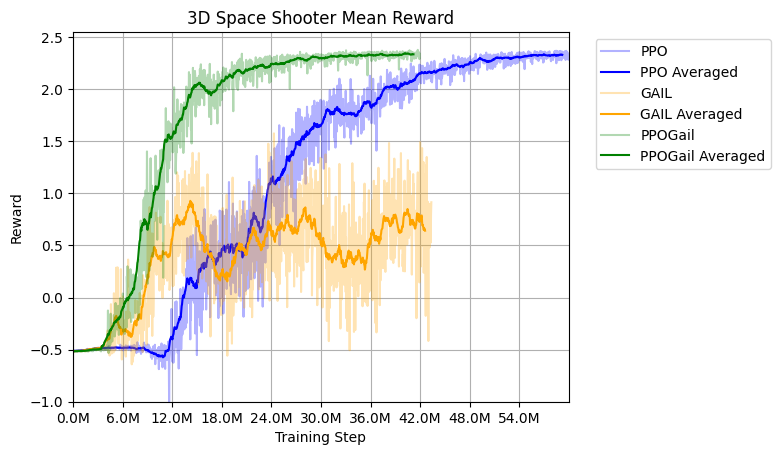

In [ ]:
# Mean Reward

plt.xlabel("Training Step")
plt.ylabel("Reward")
plt.title("3D Space Shooter Mean Reward")

label = "Environment/Cumulative Reward"

TimeArr = getValuesForMultiple('Space/PPO',label,6)
plt.plot(TimeArr , alpha = 0.3,  color='blue')
plt.plot(moving_avg(TimeArr, 20), color='blue' )

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*40, 40)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::150] ,tickList[::150])



TimeArr = getValuesFor('Space/Gail',label)
plt.plot(TimeArr , alpha = 0.3, color='orange')
plt.plot(moving_avg(TimeArr, 20), color='orange' )

TimeArr = getValuesForMultiple('Space/PPOGail',label,3)
plt.plot(TimeArr, alpha = 0.3, color='green')
plt.plot(moving_avg(TimeArr, 20), color='green' )



plt.ylim(-1)
plt.xlim(0,1500)

plt.grid()

plt.legend(["PPO", "PPO Averaged","GAIL", "GAIL Averaged","PPOGail", "PPOGail Averaged"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

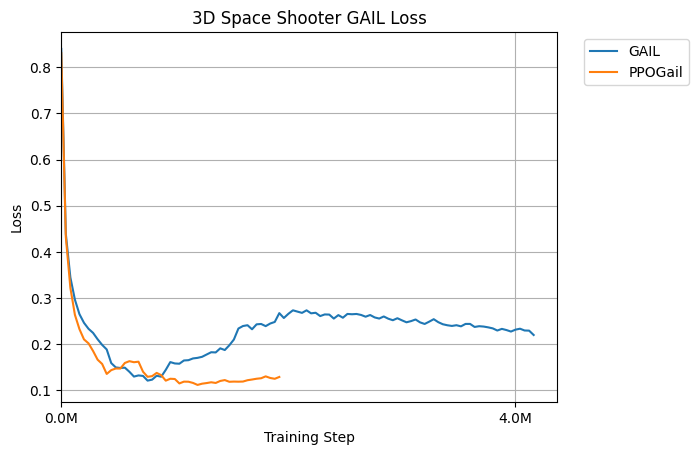

In [ ]:
# Losses/GAIL Loss
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("3D Space Shooter GAIL Loss")



label = "Losses/GAIL Loss"

TimeArr = getValuesFor('Space/Gail',label)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*40, 40)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::100] ,tickList[::100])



TimeArr = getValuesForMultiple('Space/PPOGail',label,3)
plt.plot(TimeArr)


#plt.ylim(0)
plt.xlim(0)

plt.grid()

plt.legend(["GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

In [ ]:
# Get max reward for each method
label = 'Environment/Cumulative Reward'

PPOArr = getValuesForMultiple('Space/PPO',label,6)

GAILArr = getValuesFor('Space/Gail',label)

PPOGAILArr = getValuesForMultiple('Space/PPOGail',label,3)

print(np.argmax(PPOArr))

print("Max Reward")
print(f"PPO: {max(PPOArr)} , index: {np.argmax(PPOArr)}")
print(f"GAIL: {max(GAILArr)}, index: {np.argmax(GAILArr)} ")
print(f"GAILPPO: {max(PPOGAILArr)}, index: {np.argmax(PPOGAILArr)}")

1463
Max Reward
PPO: 2.368685245513916 , index: 1463
GAIL: 1.5758450031280518, index: 608 
GAILPPO: 2.377304792404175, index: 1043


# Crawler

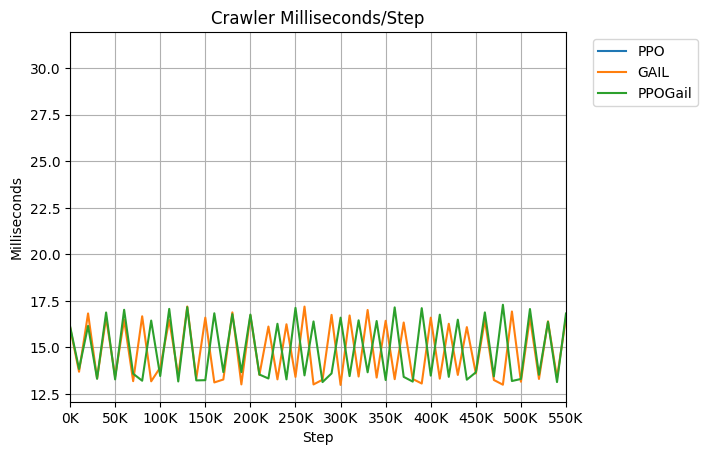

In [ ]:
# Milliseconds
plt.xlabel("Step")
plt.ylabel("Milliseconds")
plt.title("Crawler Milliseconds/Step")


TimeArr = getValuesFor('Crawler/PPO',"Time/Step : Millis")
#TimeArr.pop(0)
plt.plot(TimeArr)

TimeArr = getValuesFor('Crawler/Gail',"Time/Step : Millis")
#TimeArr.pop(0)
plt.plot(TimeArr)


TimeArr = getValuesFor('Crawler/PPOGail',"Time/Step : Millis")
#TimeArr.pop(0)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x)+"K")

plt.xticks(total[::5] ,tickList[::5])


#plt.ylim(0)
plt.xlim(0,55)

plt.grid()
plt.legend(["PPO","GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

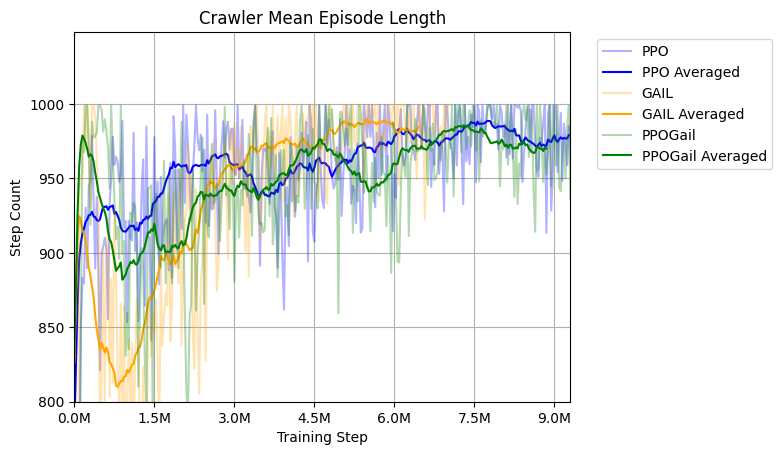

In [ ]:
# Episode Length
plt.xlabel("Training Step")
plt.ylabel("Step Count")
plt.title("Crawler Mean Episode Length")

label = "Environment/Episode Length"

TimeArr = getValuesFor('Crawler/PPO',label)
plt.plot(TimeArr , alpha = 0.3,  color='blue')
plt.plot(moving_avg(TimeArr, 20), color='blue' )

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*30, 30)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::50] ,tickList[::50])



TimeArr = getValuesFor('Crawler/Gail',label)
plt.plot(TimeArr , alpha = 0.3, color='orange')
plt.plot(moving_avg(TimeArr, 20), color='orange' )

TimeArr = getValuesFor('Crawler/PPOGail',label)
plt.plot(TimeArr, alpha = 0.3, color='green')
plt.plot(moving_avg(TimeArr, 20), color='green' )



plt.ylim(800)
plt.xlim(0,310)

plt.grid()

plt.legend(["PPO", "PPO Averaged","GAIL", "GAIL Averaged","PPOGail", "PPOGail Averaged"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

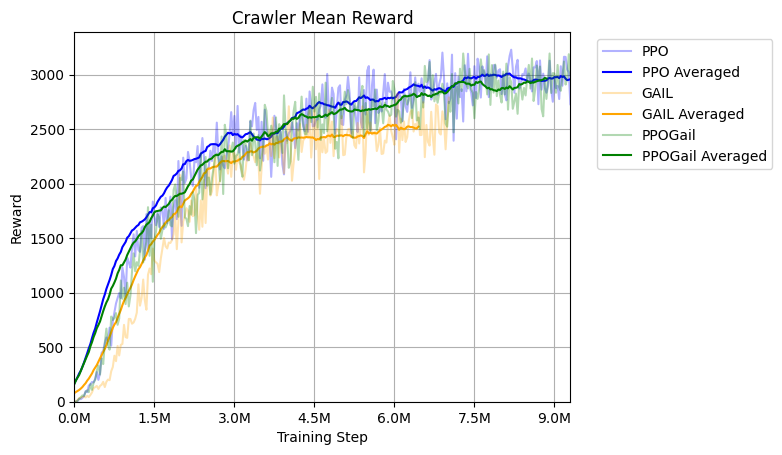

In [ ]:
# Mean Reward

plt.xlabel("Training Step")
plt.ylabel("Reward")
plt.title("Crawler Mean Reward")

label = "Environment/Cumulative Reward"

TimeArr = getValuesFor('Crawler/PPO',label)
plt.plot(TimeArr , alpha = 0.3,  color='blue')
plt.plot(moving_avg(TimeArr, 20), color='blue' )

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*30, 30)
tickList = []
for x in num:
  tickList.append(str(x/1000)+"M")

plt.xticks(total[::50] ,tickList[::50])



TimeArr = getValuesFor('Crawler/Gail',label)
plt.plot(TimeArr , alpha = 0.3, color='orange')
plt.plot(moving_avg(TimeArr, 20), color='orange' )

TimeArr = getValuesFor('Crawler/PPOGail',label)
plt.plot(TimeArr, alpha = 0.3, color='green')
plt.plot(moving_avg(TimeArr, 20), color='green' )



plt.ylim(0)
plt.xlim(0,310)

plt.grid()

plt.legend(["PPO", "PPO Averaged","GAIL", "GAIL Averaged","PPOGail", "PPOGail Averaged"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

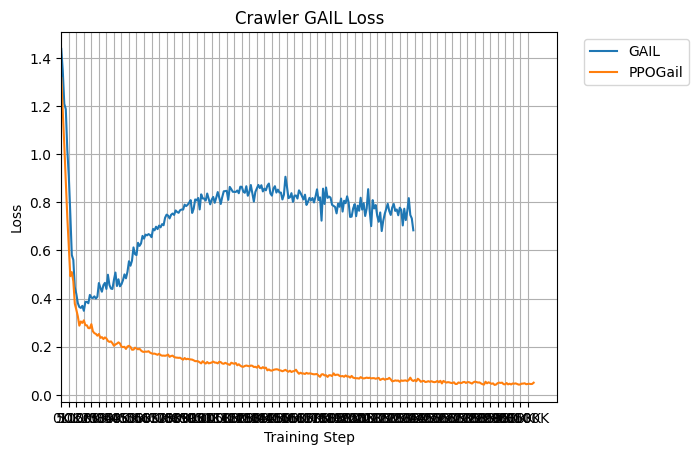

In [ ]:
# Losses/GAIL Loss
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Crawler GAIL Loss")



label = "Losses/GAIL Loss"

TimeArr = getValuesFor('Crawler/Gail',label)
plt.plot(TimeArr)


TimeArr = getValuesFor('Crawler/PPOGail',label)
plt.plot(TimeArr)

total = range(0, len(TimeArr), 1)
num = range(0, len(TimeArr)*10, 10)
tickList = []
for x in num:
  tickList.append(str(x)+"K")

plt.xticks(total[::5] ,tickList[::5])

#plt.ylim(0)
plt.xlim(0)

plt.grid()

plt.legend(["GAIL","PPOGail"], bbox_to_anchor=(1.04, 1), loc="upper left" )
plt.show()

In [ ]:
# Get max reward for each method
label = 'Environment/Cumulative Reward'

PPOArr = getValuesFor('Crawler/PPO',label)

GAILArr = getValuesFor('Crawler/Gail',label)

PPOGAILArr = getValuesFor('Crawler/PPOGail',label)

print(np.argmax(PPOArr))

print("Max Reward")
print(f"PPO: {max(PPOArr)} , index: {np.argmax(PPOArr)}")
print(f"GAIL: {max(GAILArr)}, index: {np.argmax(GAILArr)} ")
print(f"GAILPPO: {max(PPOGAILArr)}, index: {np.argmax(PPOGAILArr)}")

273
Max Reward
PPO: 3228.82080078125 , index: 273
GAIL: 2828.490966796875, index: 202 
GAILPPO: 3194.4150390625, index: 243
